In [18]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# Loading the preprocessed data
df = pd.read_csv(r'C:\Users\Hp\Desktop\work\machine-learning-assignment-1-group-2\notebooks\student2_success_preprocessed.csv')
df.head()

,student_id,age,gender,socioeconomic_status,previous_gpa,attendance_rate,participation_score,assignment_completion,family_support,study_resources,study_hours_per_week,program_of_study,digital_literacy,previous_course_failures,extracurricular_hours,work_hours_per_week,distance_from_campus,final_grade,completed_course,first_generation_student_True
0,STU0001,0.470598,2,0,0.953619,0.082947,1.667617,-0.487565,2,"Textbooks, Online Resources",-1.141371,Business,-2.017813,-0.528397,-0.565567,0.547661,-0.179119,100,True,True
1,STU0002,-0.322990,1,1,1.928783,0.751873,-0.383307,-1.656368,1,"Textbooks, Online Resources, Tutoring",-0.542006,Computer Science,-0.585461,-0.528397,0.011879,-0.871640,-1.022471,100,True,True
2,STU0003,0.470598,1,0,-1.491790,0.016054,1.181872,1.223665,2,"Online Resources, Tutoring",-0.392165,Economics,-1.699512,1.428629,-0.359336,-0.398540,-0.389957,100,True,False
3,STU0004,1.660980,2,1,0.563554,0.618088,-0.221392,-0.803981,2,"Textbooks, Online Resources, Tutoring",-0.212355,Mathematics,-0.373260,-0.528397,-0.070613,1.210001,3.053733,100,True,True
4,STU0005,-0.322990,0,0,-0.711659,0.751873,1.181872,1.398017,2,"Textbooks, Online Resources, Study Group",-0.392165,Economics,0.581641,-0.528397,0.960540,0.547661,0.687660,100,True,True


# 4.1 Derived Features

In [20]:
# Interaction term between study hours and participation score
df['study_participation_interaction'] = df['study_hours_per_week'] * df['participation_score']

# Combining work and extracurricular hours into a single feature
df['work_extracurricular_hours'] = df['work_hours_per_week'] + df['extracurricular_hours']

# Ratio of assignment completion to study hours
df['assignment_study_ratio'] = df['assignment_completion'] / (df['study_hours_per_week'] + 1)  # +1 to avoid division by zero

df.head()


,student_id,age,gender,socioeconomic_status,previous_gpa,attendance_rate,participation_score,assignment_completion,family_support,study_resources,...,previous_course_failures,extracurricular_hours,work_hours_per_week,distance_from_campus,final_grade,completed_course,first_generation_student_True,study_participation_interaction,work_extracurricular_hours,assignment_study_ratio
0,STU0001,0.470598,2,0,0.953619,0.082947,1.667617,-0.487565,2,"Textbooks, Online Resources",...,-0.528397,-0.565567,0.547661,-0.179119,100,True,True,-1.903369,-0.017906,3.448838
1,STU0002,-0.322990,1,1,1.928783,0.751873,-0.383307,-1.656368,1,"Textbooks, Online Resources, Tutoring",...,-0.528397,0.011879,-0.871640,-1.022471,100,True,True,0.207755,-0.859761,-3.616569
2,STU0003,0.470598,1,0,-1.491790,0.016054,1.181872,1.223665,2,"Online Resources, Tutoring",...,1.428629,-0.359336,-0.398540,-0.389957,100,True,False,-0.463488,-0.757876,2.013152
3,STU0004,1.660980,2,1,0.563554,0.618088,-0.221392,-0.803981,2,"Textbooks, Online Resources, Tutoring",...,-0.528397,-0.070613,1.210001,3.053733,100,True,True,0.047014,1.139387,-1.020741
4,STU0005,-0.322990,0,0,-0.711659,0.751873,1.181872,1.398017,2,"Textbooks, Online Resources, Study Group",...,-0.528397,0.960540,0.547661,0.687660,100,True,True,-0.463488,1.508201,2.299993


# 4.2 Dimensionality Reduction

In [21]:
# Selecting the one-hot encoded columns (all boolean columns)
one_hot_columns = df.select_dtypes(include=['bool']).columns

# Applying PCA to reduce dimensions of these binary features
pca = PCA(n_components=0.95)  # retain 95% of variance
pca_result = pca.fit_transform(df[one_hot_columns])

# Creating dataframe from PCA result
pca_df = pd.DataFrame(pca_result, columns=[f'pca_feature_{i+1}' for i in range(pca_result.shape[1])])

# Dropping original one-hot encoded columns and concatenate PCA results
df = df.drop(columns=one_hot_columns).reset_index(drop=True)
df = pd.concat([df, pca_df], axis=1)

df.head()

,student_id,age,gender,socioeconomic_status,previous_gpa,attendance_rate,participation_score,assignment_completion,family_support,study_resources,...,digital_literacy,previous_course_failures,extracurricular_hours,work_hours_per_week,distance_from_campus,final_grade,study_participation_interaction,work_extracurricular_hours,assignment_study_ratio,pca_feature_1
0,STU0001,0.470598,2,0,0.953619,0.082947,1.667617,-0.487565,2,"Textbooks, Online Resources",...,-2.017813,-0.528397,-0.565567,0.547661,-0.179119,100,-1.903369,-0.017906,3.448838,0.506004
1,STU0002,-0.322990,1,1,1.928783,0.751873,-0.383307,-1.656368,1,"Textbooks, Online Resources, Tutoring",...,-0.585461,-0.528397,0.011879,-0.871640,-1.022471,100,0.207755,-0.859761,-3.616569,0.506004
2,STU0003,0.470598,1,0,-1.491790,0.016054,1.181872,1.223665,2,"Online Resources, Tutoring",...,-1.699512,1.428629,-0.359336,-0.398540,-0.389957,100,-0.463488,-0.757876,2.013152,-0.493988
3,STU0004,1.660980,2,1,0.563554,0.618088,-0.221392,-0.803981,2,"Textbooks, Online Resources, Tutoring",...,-0.373260,-0.528397,-0.070613,1.210001,3.053733,100,0.047014,1.139387,-1.020741,0.506004
4,STU0005,-0.322990,0,0,-0.711659,0.751873,1.181872,1.398017,2,"Textbooks, Online Resources, Study Group",...,0.581641,-0.528397,0.960540,0.547661,0.687660,100,-0.463488,1.508201,2.299993,0.506004


# 4.3 Correlation Analysis

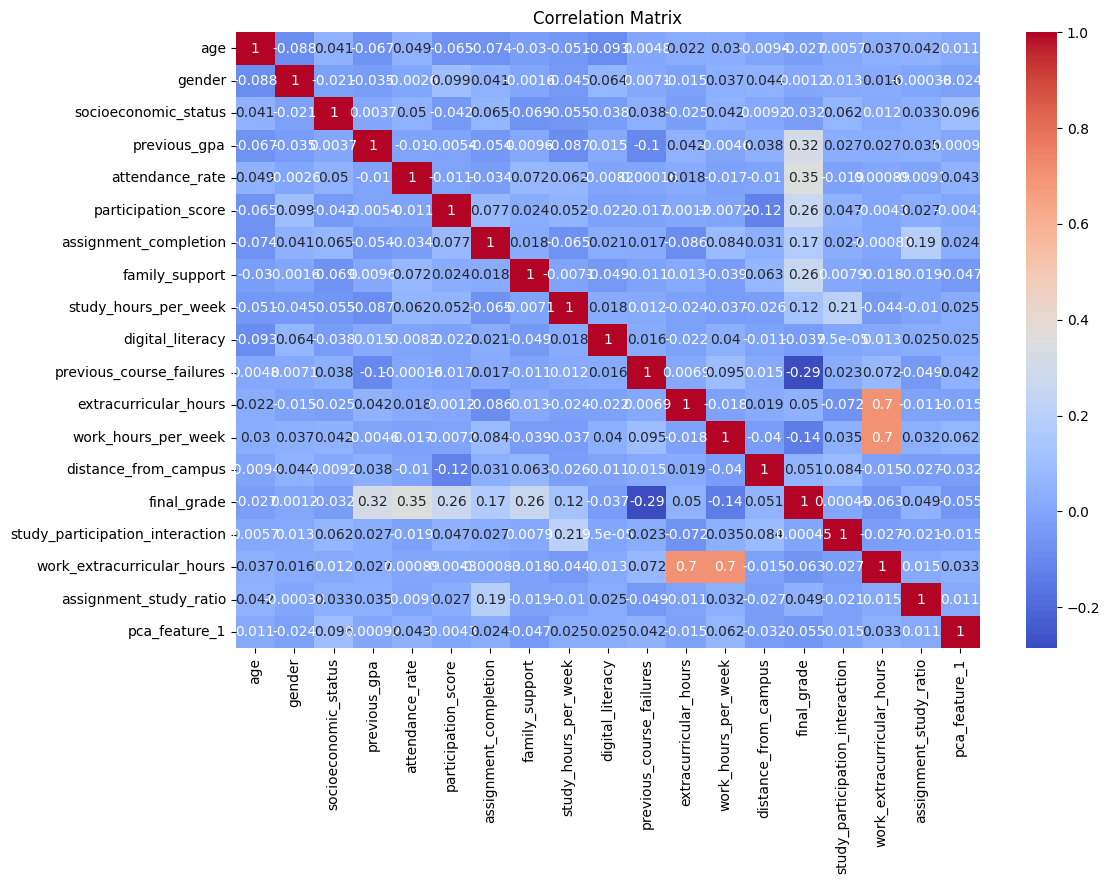

Top correlations with final_grade:
final_grade                        1.000000
attendance_rate                    0.354536
previous_gpa                       0.316125
participation_score                0.262517
family_support                     0.257603
assignment_completion              0.170208
study_hours_per_week               0.119064
distance_from_campus               0.051017
extracurricular_hours              0.050209
assignment_study_ratio             0.048540
gender                             0.001160
study_participation_interaction    0.000452
age                               -0.027188
socioeconomic_status              -0.032300
digital_literacy                  -0.037006
pca_feature_1                     -0.055451
work_extracurricular_hours        -0.062833
work_hours_per_week               -0.138253
previous_course_failures          -0.285680
Name: final_grade, dtype: float64


In [22]:
# Exclude non-numeric columns like IDs or categoricals
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with the target 'final_grade'
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Top correlations with target
target_corr = correlation_matrix['final_grade'].sort_values(ascending=False)
print("Top correlations with final_grade:")
print(target_corr)

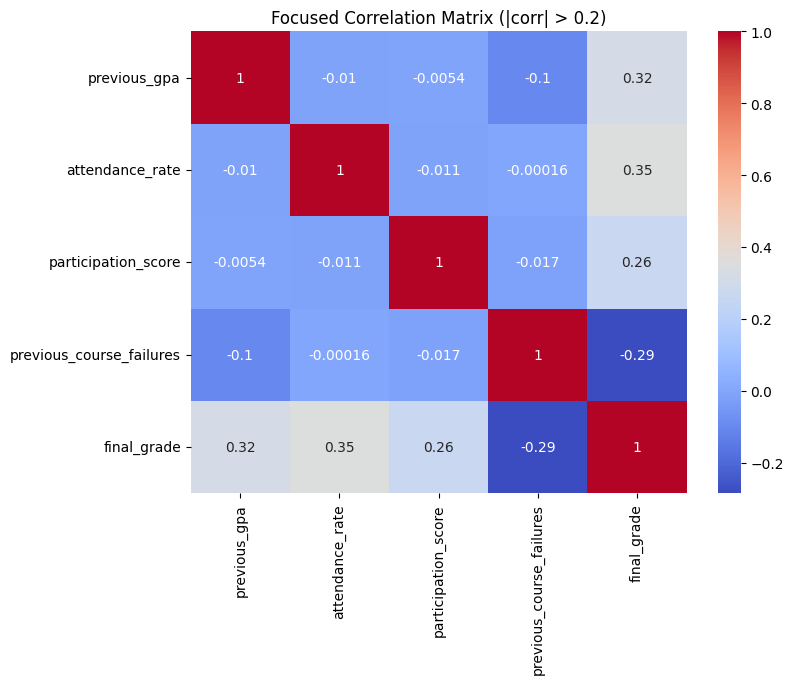

In [11]:
# Filter for correlations only related to 'final_grade'
target_corr = correlation_matrix['final_grade'].drop('final_grade')
top_corr_features = target_corr[abs(target_corr) > 0.2].index  # Only show correlations > 0.2

# Create a smaller correlation matrix with only important features
reduced_corr = numeric_df[top_corr_features.tolist() + ['final_grade']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(reduced_corr, annot=True, cmap='coolwarm')
plt.title('Focused Correlation Matrix (|corr| > 0.2)')
plt.show()

# Summary:

    Strong positive factors for final_grade include attendance, previous GPA, and participation.
    Negative factors include previous course failures and work hours.
    The PCA features provide mixed, weaker correlations and need more interpretation based on the context of what they represent.

# Feature Selection

In [23]:
# Select features with high correlation (>0.3 or <-0.3) with the target
selected_features = target_corr[(target_corr > 0.3) | (target_corr < -0.3)].index.tolist()

# Add features with lower correlation but potential impact
additional_features = [
    'participation_score',
    'assignment_completion',
    'study_hours_per_week',
    'extracurricular_hours',
    'distance_from_campus',
    'work_hours_per_week',
    'previous_course_failures'
]

# Combine the selected features, ensuring no duplicates and not including 'final_grade'
selected_features = list(set(selected_features + additional_features))

# Final dataset with selected features + target (final_grade)
df_selected = df[selected_features + ['final_grade']]

# Print the final selected features list and dataset
print(f"Selected Features: {selected_features}")
df_selected.head()

Selected Features: ['participation_score', 'attendance_rate', 'previous_course_failures', 'extracurricular_hours', 'previous_gpa', 'final_grade', 'work_hours_per_week', 'distance_from_campus', 'study_hours_per_week', 'assignment_completion']


,participation_score,attendance_rate,previous_course_failures,extracurricular_hours,previous_gpa,final_grade,work_hours_per_week,distance_from_campus,study_hours_per_week,assignment_completion,final_grade
0,1.667617,0.082947,-0.528397,-0.565567,0.953619,100,0.547661,-0.179119,-1.141371,-0.487565,100
1,-0.383307,0.751873,-0.528397,0.011879,1.928783,100,-0.871640,-1.022471,-0.542006,-1.656368,100
2,1.181872,0.016054,1.428629,-0.359336,-1.491790,100,-0.398540,-0.389957,-0.392165,1.223665,100
3,-0.221392,0.618088,-0.528397,-0.070613,0.563554,100,1.210001,3.053733,-0.212355,-0.803981,100
4,1.181872,0.751873,-0.528397,0.960540,-0.711659,100,0.547661,0.687660,-0.392165,1.398017,100


In [24]:
# Save the final dataset to a CSV file
df_selected.to_csv('student_feature_success_selected_features.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!
